## Unsupervised Learning Project

### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
d1 = pd.read_csv('Car name.csv')
d1

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [3]:
d2 = pd.read_json('Car-Attributes.json')
d2

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame.

In [4]:
frame = [d1, d2]
data = pd.concat(frame, axis=1)
data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


### Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [5]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Almost all the numeric variable show positively skewed distribution as the mean is greater than the median. But, it is clearly evident in the variable 'disp' and 'wt'.

### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [6]:
## check for missing value

data.isnull().values.any()

False

In [7]:
## feature-wise percentage of missing values

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
car_name,car_name,0.0
mpg,mpg,0.0
cyl,cyl,0.0
disp,disp,0.0
hp,hp,0.0
wt,wt,0.0
acc,acc,0.0
yr,yr,0.0
origin,origin,0.0


So there are no missing values present in the data.

### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [8]:
## check for duplicate rows

len(data[data.duplicated()])

0

There are no duplicate rows in the dataframe.

### Part 1.2 c - Plot a pairplot for all features.

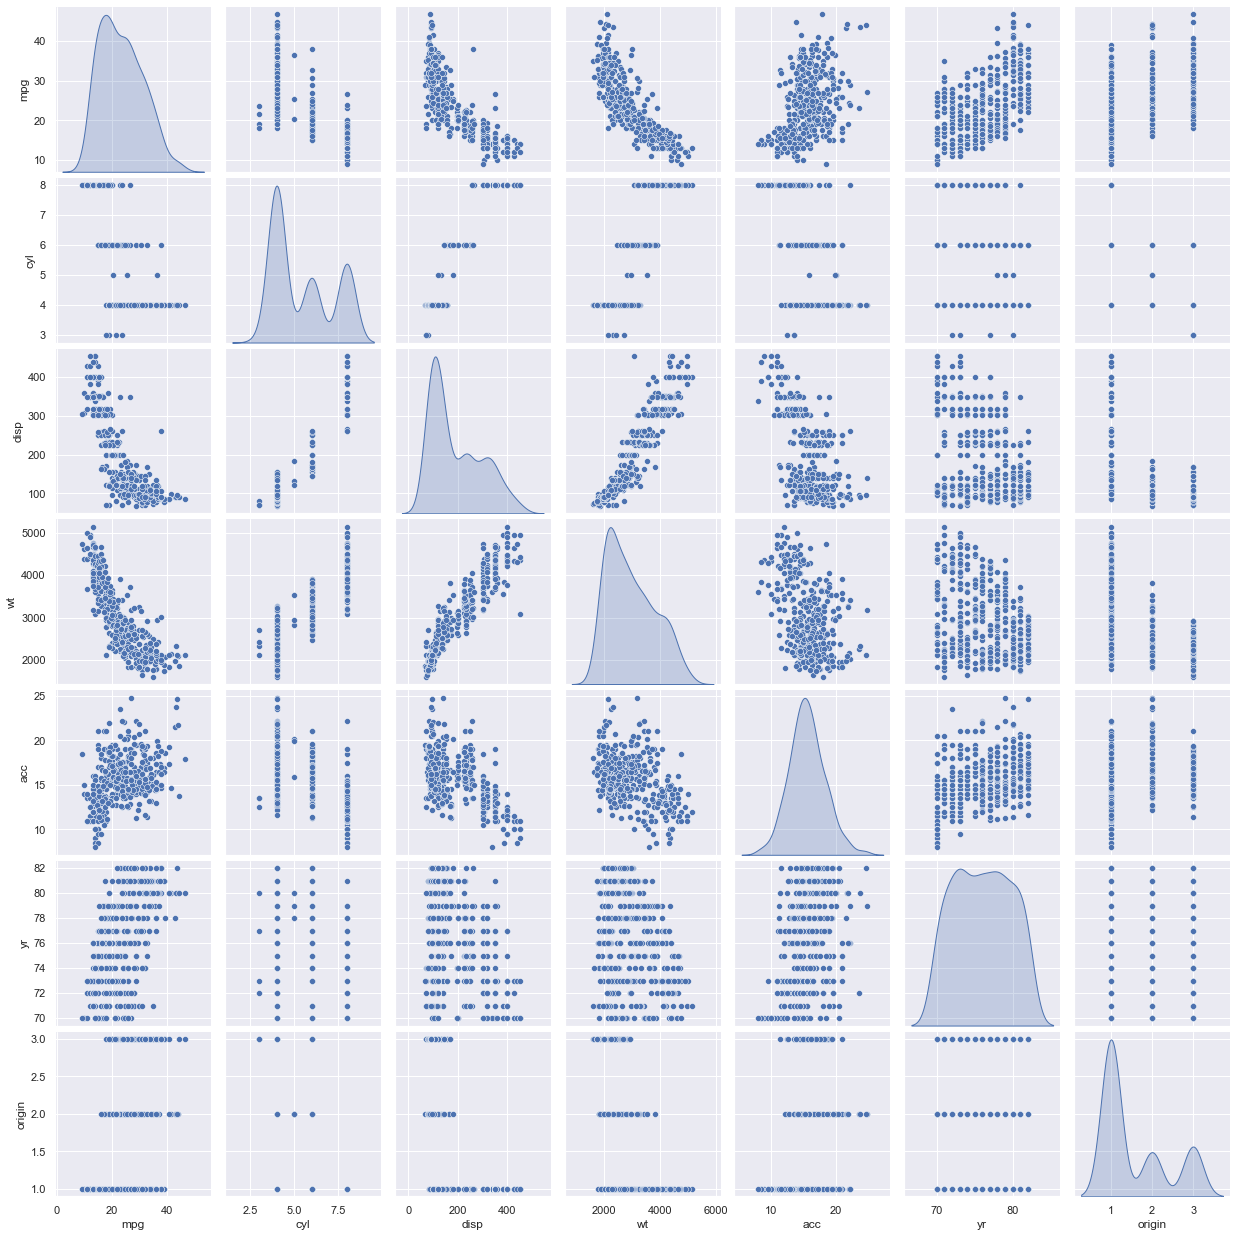

In [9]:
sns.pairplot(data, diag_kind='kde')

### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

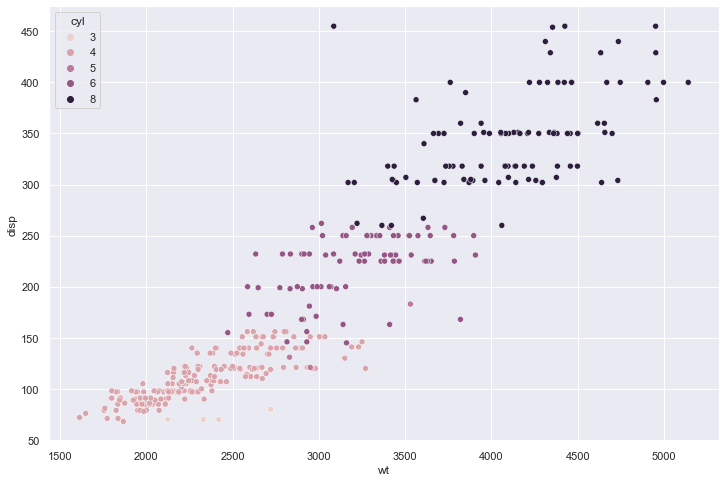

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='wt', y='disp', hue='cyl')
plt.show()

### Part 1.2 e - Share insights for Q2.d.

There is a positive correlation between 'wt' and 'disp'. As the weight increases, displacement also increases. Further, the range of 'wt' and 'disp' increases as the number of cylinder increases. Higher the number of cylinder, higher the weight & displacement and vice versa.

### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

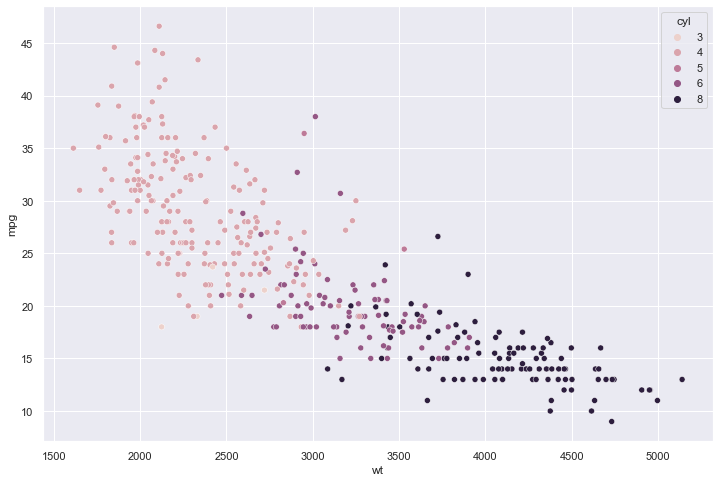

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='wt', y='mpg', hue='cyl')
plt.show()

### Part 1.2 g- Share insights for Q2.f.

There is a negative correlation between 'wt' and 'mpg'. As the weight increases, mpg decreases and vice versa. Further, the range of 'wt' and 'mpg' decreases as the number of cylinder increases. Higher the number of cylinder, lower the mpg and vice versa.

### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [12]:
## check for unexpected values
for i in data.columns:
    print(i, ':' ,data[i].unique())
    print('\n')

car_name : ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 

We see an unexpected value '?' in the variable 'hp'. All other variables doesn't have unexpected values.

In [13]:
## display all the rows with unexpected value

data[data['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [14]:
## Replace the unexpected value '?' with the mean and change the data type of 'hp' to float

data['hp'] = data['hp'].replace('?', 0)
data['hp'] = data['hp'].replace(0, data['hp'].mean())
data['hp'] = data['hp'].astype('float')

## Drop the column 'car_name'

data_final = data.drop('car_name', axis=1)
data_final.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [15]:
from sklearn.cluster import KMeans

In [16]:
cluster_range = range(2,11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(data_final)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,7.429131e+07
1,3,3.420895e+07
2,4,1.905827e+07
3,5,1.377137e+07
4,6,1.032273e+07
5,7,7.664425e+06
6,8,5.670487e+06
7,9,4.795437e+06
8,10,4.044610e+06


### Part 1.3 b - Plot a visual and find elbow point.

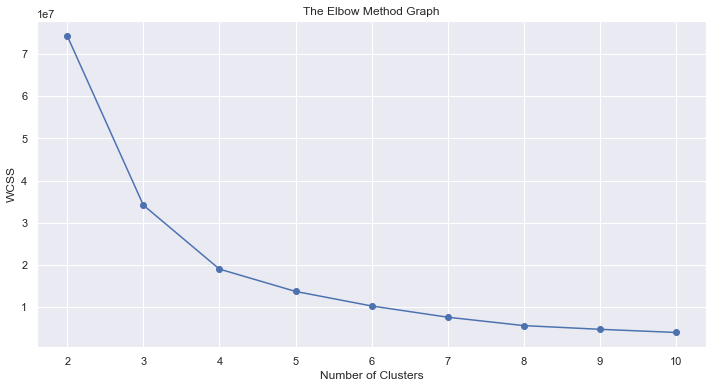

In [17]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

From the above plot, we can see a bend at 4. So, let us create 4 clusters.

### Part 1.3 c - On the above visual, highlight which are the possible Elbow points.

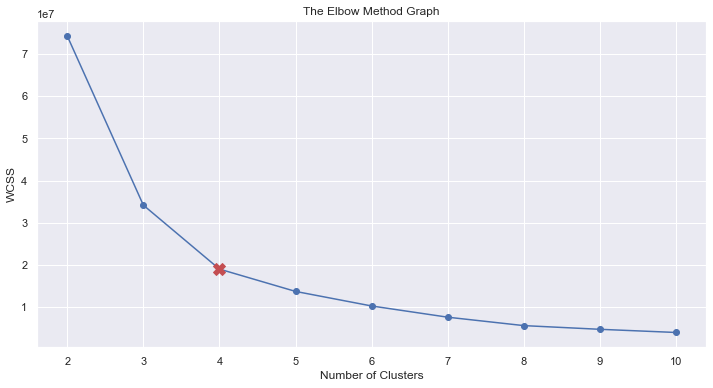

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.plot(clusters_df.iloc[2,0], clusters_df.iloc[2,1], marker='X',markersize=12, color='r')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

The possible elbow point is highlighted in the above plot with 'X' symbol in red color.

### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [19]:
## Train model on optimal number of clusters i.e. 4

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_final)

KMeans(n_clusters=4, random_state=42)

In [20]:
## Prediction

predictions = kmeans.predict(data_final)
predictions

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 3, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0,
       2, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 3, 3, 2, 2, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 2, 3, 1, 3, 2, 3, 1, 1, 3, 3, 0, 0, 0, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 3, 0, 0, 3, 2, 2, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 1, 0, 0, 0, 2, 3, 3, 3, 3,

### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value.

In [21]:
# Add cluster number to original cars data

data["group"] = predictions
data['group'] = data['group'].astype('category')
data.dtypes

car_name      object
mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
group       category
dtype: object

In [22]:
## Check the number of clusters

data['group'].unique()

[3, 1, 2, 0]
Categories (4, int64): [0, 1, 2, 3]

So there are 4 clusters with label 0, 1, 2 & 3.

In [23]:
## View the dataframe with new feature

data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,3
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,2
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,0
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,0
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,2


### Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

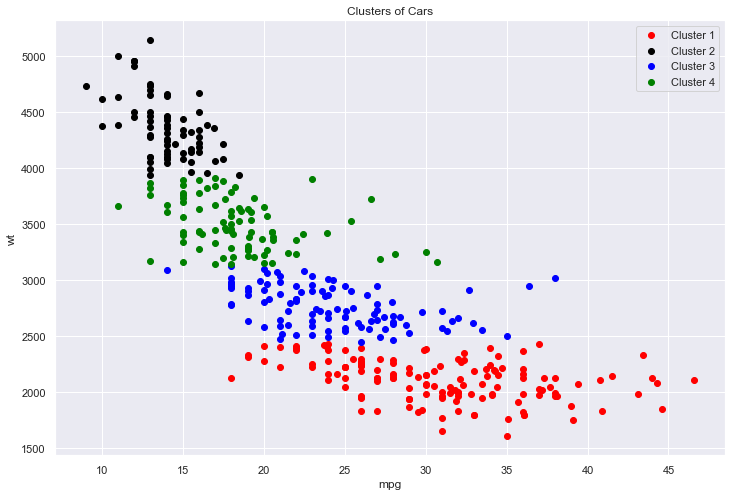

In [24]:
label_0 = data_final[predictions == 0]
label_1 = data_final[predictions == 1]
label_2 = data_final[predictions == 2]
label_3 = data_final[predictions == 3]

cols = label_0.columns

plt.figure(figsize=(12,8))
plt.scatter(label_0[cols[0]], label_0[cols[4]], color = 'red', label='Cluster 1')
plt.scatter(label_1[cols[0]], label_1[cols[4]], color = 'black', label='Cluster 2')
plt.scatter(label_2[cols[0]], label_2[cols[4]], color = 'blue', label='Cluster 3')
plt.scatter(label_3[cols[0]], label_3[cols[4]], color = 'green', label='Cluster 4')
plt.title('Clusters of Cars')
plt.xlabel('mpg')
plt.ylabel('wt')
plt.legend()

plt.show()

### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.

In [25]:
new_datapoint = [20.0, 6, 320, 130, 3480, 11, 70, 1]
kmeans.predict([new_datapoint])

array([3])

The new datapoint belongs to Cluster 4.

### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [26]:
vehicle = pd.read_csv('vehicle.csv')
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


### Part 2.1 b- Check percentage of missing values and impute with correct approach.

In [27]:
for i in vehicle.columns:
    print(i, vehicle.isnull().sum()*100/len(vehicle))

compactness compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64
circularity compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
m

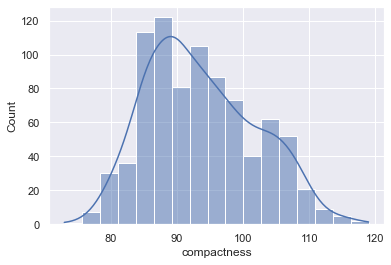

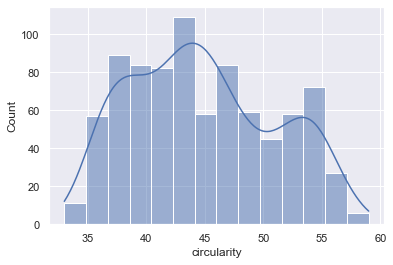

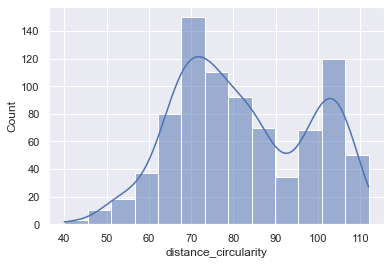

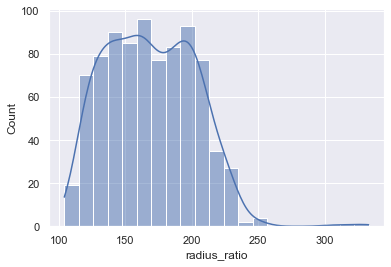

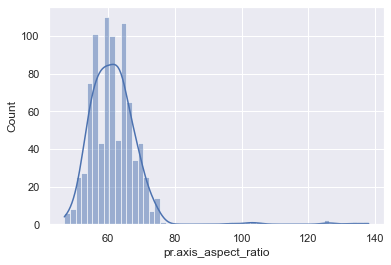

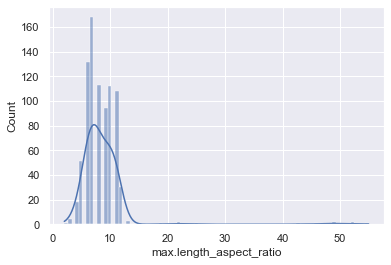

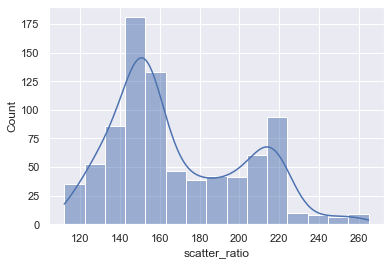

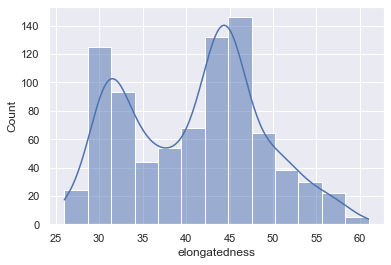

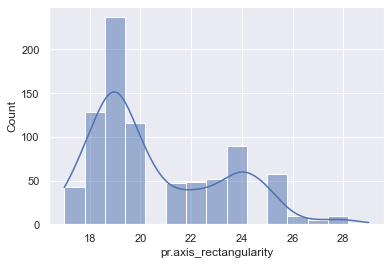

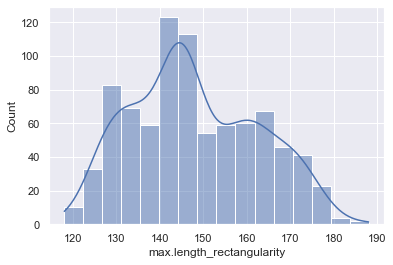

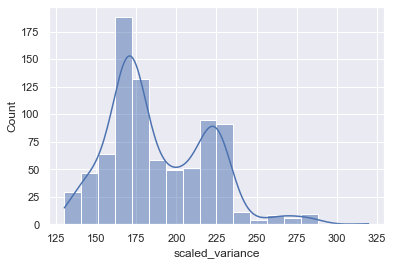

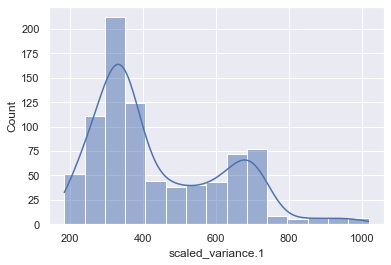

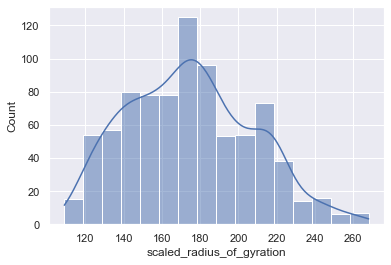

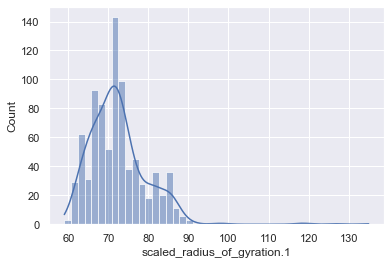

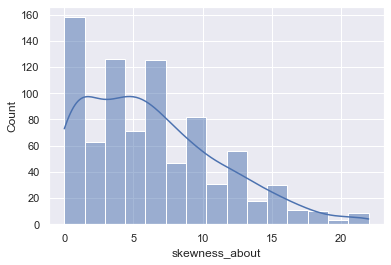

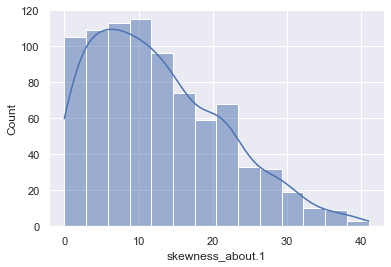

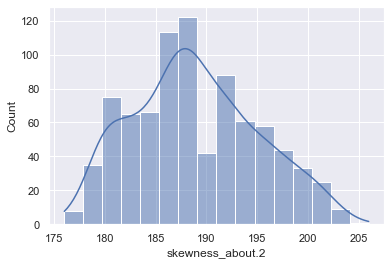

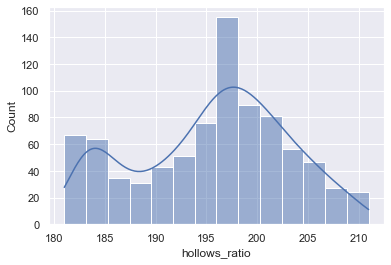

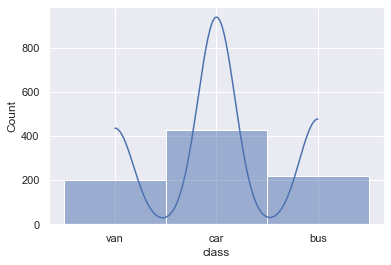

In [28]:
## Check the distribution of data

for i, col in enumerate(vehicle.columns):
    plt.figure(i)
    sns.histplot(vehicle, x=vehicle[col], kde=True)

As the data is skewed in almost all variables, we will replace the missing values with median.

In [29]:
## Replace the missing values with median and check again for missing value.

vehicle.iloc[:,0:18] = vehicle.iloc[:,0:18].fillna(vehicle.iloc[:,0:18].median())
vehicle.isna().sum().sum()

0

### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

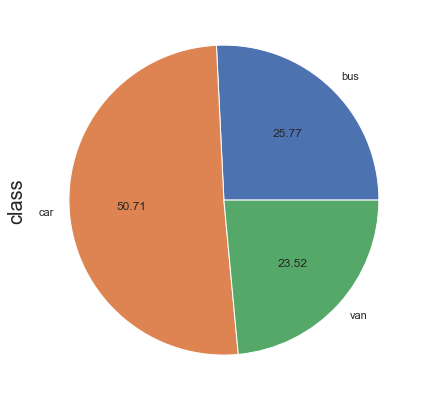

In [30]:
for i in vehicle.select_dtypes("object"):
        vehicle.groupby(vehicle[i]).size().plot(kind='pie', autopct='%.2f', figsize=(6,6))
        plt.ylabel(i, size=20)
        plt.tight_layout()
        plt.show()

### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.

In [31]:
## check for duplicate rows

len(vehicle[vehicle.duplicated()])

0

There are no duplicate rows in the data.

### Part 2.2 a - Split data into X and Y.

In [32]:
X = vehicle.iloc[:,0:18]
y = vehicle['class']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Part 2.2 b - Standardize the Data.

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 2.3 a - Train a base Classification model using SVM.

In [34]:
## Base svm model

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [35]:
## Prediction

y_pred = svm.predict(X_train)

### Part 2.3 b - Print Classification metrics for train data.

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       178
         car       0.99      0.98      0.98       334
         van       0.95      0.97      0.96       164

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



### Part 2.3 c - Apply PCA on the data with 10 components.

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

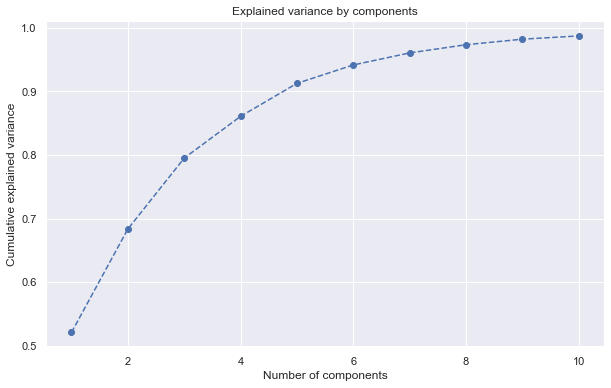

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

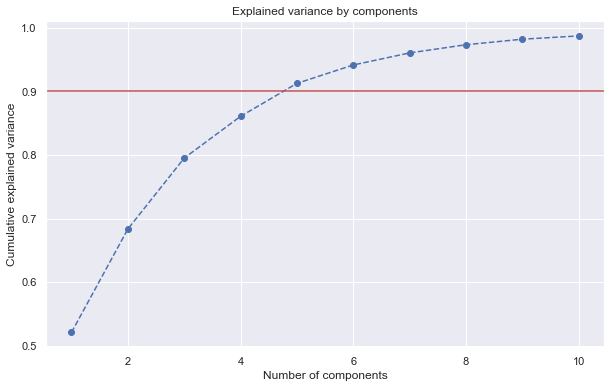

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

From the above plot, we can imply that the minimum components with 90% or above variance explained is 5.

In [40]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Part 2.3 g - Train SVM model on components selected from above step.

In [41]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

In [42]:
y_pred1 = svm1.predict(X_train)

### Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [43]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

         bus       0.88      0.69      0.77       178
         car       0.85      0.88      0.87       334
         van       0.69      0.80      0.74       164

    accuracy                           0.81       676
   macro avg       0.81      0.79      0.79       676
weighted avg       0.82      0.81      0.81       676



After applying pca, we can see that the all the metrics have decreased as compared to the model with all the features.

### Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [44]:
## Tune parameters for svm model with default kernel 'rbf' using different values of 'C' and 'gamma'
from sklearn import metrics

c_values = []
gamma_values = []
accuracy = []
precision = []
recall = []
f1_score = []

C = [0.001,0.01,0.1,1,100,1000]
gamma = [0.001,0.01,0.1,1,100,1000]
for i in C:
    for j in gamma:
        svm_model = SVC(C=i, gamma=j)
        svm_model.fit(X_train,y_train)
        pred = svm_model.predict(X_test)
        c_values.append(i)
        gamma_values.append(j)
        accuracy.append(metrics.accuracy_score(y_test,pred))
        precision.append(metrics.precision_score(y_test,pred, average='weighted', zero_division=0))
        recall.append(metrics.recall_score(y_test,pred, average='weighted'))
        f1_score.append(metrics.f1_score(y_test,pred, average='weighted'))

In [45]:
## Create a score table with different values of 'C' and 'gamma'
d = {'C': c_values, 'Gamma': gamma_values, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1-score': f1_score}
pd.DataFrame(data=d)

,C,Gamma,Accuracy,Precision,Recall,f1-score
0,0.001,0.001,0.558824,0.312284,0.558824,0.400666
1,0.001,0.010,0.558824,0.312284,0.558824,0.400666
2,0.001,0.100,0.558824,0.312284,0.558824,0.400666
3,0.001,1.000,0.558824,0.312284,0.558824,0.400666
4,0.001,100.000,0.558824,0.312284,0.558824,0.400666
5,0.001,1000.000,0.558824,0.312284,0.558824,0.400666
6,0.010,0.001,0.558824,0.312284,0.558824,0.400666
7,0.010,0.010,0.558824,0.312284,0.558824,0.400666
8,0.010,0.100,0.558824,0.312284,0.558824,0.400666
9,0.010,1.000,0.558824,0.312284,0.558824,0.400666


### Part 2.4 b- Share best Parameters observed from above step.

From the above dataframe, we can say that the SVM model with C=1000 and gamma=0.010 gives the highest accuracy, precision, recall and f1 score.

### Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [46]:
svm2 = SVC(C=1000, gamma=0.010)
svm2.fit(X_train,y_train)

SVC(C=1000, gamma=0.01)

In [47]:
pred = svm2.predict(X_train)

In [48]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

         bus       0.85      0.79      0.82       178
         car       0.90      0.92      0.91       334
         van       0.78      0.80      0.79       164

    accuracy                           0.86       676
   macro avg       0.84      0.84      0.84       676
weighted avg       0.86      0.86      0.86       676



- The first svm model without pca gave an accuray score of 0.98 on train data.
- The second svm model with pca gave an accuracy score of 0.81 on train data.
- The third svm model with pca and paramater tuning gave an accuracy score of 0.86 on train data.

### Part 2.5 a - Explain pre-requisite/assumptions of PCA.

The pre-requisite/assumptions in PCA are:
- There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.
- PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.
- All variables should be accessed on the same ratio level of measurement.
- Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade your ML model/algorithm.
- The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

### Part 2.5 b - Explain advantages and limitations of PCA.

Advantages of PCA:
- Lack of redundancy of data given the orthogonal components.
- Principal components are independent of each other, so removes correlated features.
- PCA improves the performance of the ML algorithm as it eliminates correlated variables that don't contribute in any decision making.
- PCA helps in overcoming data overfitting issues by decreasing the number of features.
- PCA results in high variance and thus improves visualization.
- Reduction of noise since the maximum variation basis is chosen and so the small variations in the background are ignored automatically.

Limitations of PCA
- It is difficult to evaluate the covariance in a proper way.
- Even the simplest invariance could not be captured by the PCA unless the training data explicitly provide this information.
- Data needs to be standardized before implementing PCA else it becomes difficult to identify optimal principal components.
- Though PCA covers maximum variance amid data features, sometimes it may skip a bit of information in comparison to the actual list of features.
- Implementing PCA over datasets leads to transforming actual features in principal components that are linear combinations of actual features, therefore principle components are difficult to read or interpret as compared to actual features.